In [1]:
import pytorch_lightning as pl 
import torch 
import sys 
sys.path.append('../..')
from net import Net 
import torch.nn as nn 
from torch.nn import functional as F 
from custom_dataset.lungdataset import LungDataset
import matplotlib.pyplot as plt 

In [3]:

net = Net.load_from_checkpoint(
    '/home/bai_gairui/multi_label/lightning_logs/version_24/checkpoints/epoch=15-step=1872.ckpt', 
    hparams_file="/home/bai_gairui/multi_label/lightning_logs/version_24/hparams.yaml", 
    map_location=torch.device("cuda:6")
)

In [4]:
ld = LungDataset(
        '/home/bai_gairui/multi_label/data/Chest_x_ray/images/', 
        '/home/bai_gairui/multi_label/data/Chest_x_ray/Data_Entry_2017_v2020.csv', 
        allow_no_finding=True,
    )

In [5]:
file_name, X, y = None, None, None
loader = iter(ld)
file_name, X, y = next(loader) 
while y.sum() <= 1:
    file_name, X, y = next(loader) 
    

In [6]:
y

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1])

In [7]:
X = X.to(net.device)

In [8]:
X, cam_feature, cam = net(X[None, ...] )

In [9]:
X.shape 

torch.Size([1, 2048, 7, 7])

In [10]:
origin_img = plt.imread('/home/bai_gairui/multi_label/data/Chest_x_ray/images/' + file_name)
origin_img.shape

(1024, 1024)

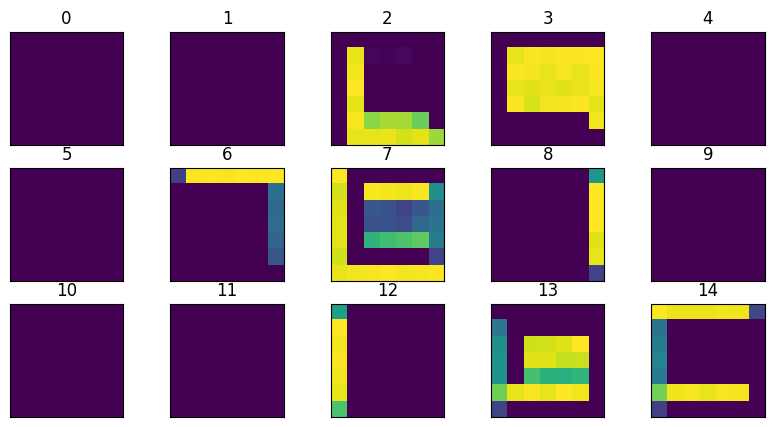

In [11]:
fig, axes = plt.subplots(3, 5)
fig.set_size_inches(10, 5)
cams = cam.cpu().detach().numpy()
for i in range(15):
    ax = axes.flatten()[i]
    ax.set_title(str(i))
    ax.imshow(cams[0, i, ...])
    ax.set_xticks([])
    ax.set_yticks([])

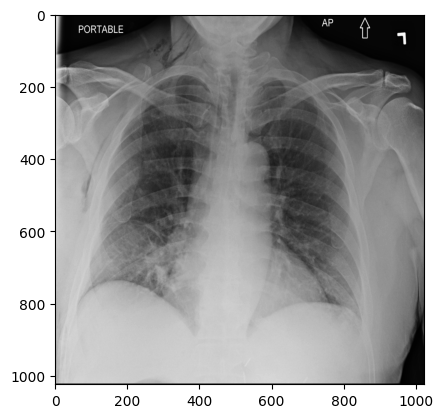

In [12]:
plt.imshow(origin_img, cmap="gray")

In [13]:
X.shape 


torch.Size([1, 2048, 7, 7])

In [14]:
activations = torch.mean(X, dim = 1)

In [15]:
activations.shape

torch.Size([1, 7, 7])

In [16]:
activations /= activations.max()

In [17]:
heatmap = activations.squeeze().cpu().detach().numpy()

In [18]:
import cv2 
import numpy as np 

In [19]:
img = cv2.imread('/home/bai_gairui/multi_label/data/Chest_x_ray/images/' + file_name)
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)

In [20]:
heatmap.shape 

(1024, 1024)

In [21]:
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = heatmap * 0.4 + img
cv2.imwrite('./map1.jpg', superimposed_img)

True

In [23]:
from torchvision import transforms as T 
from PIL import Image

In [25]:
img = Image.open('/home/bai_gairui/multi_label/data/Chest_x_ray/images/' + file_name)

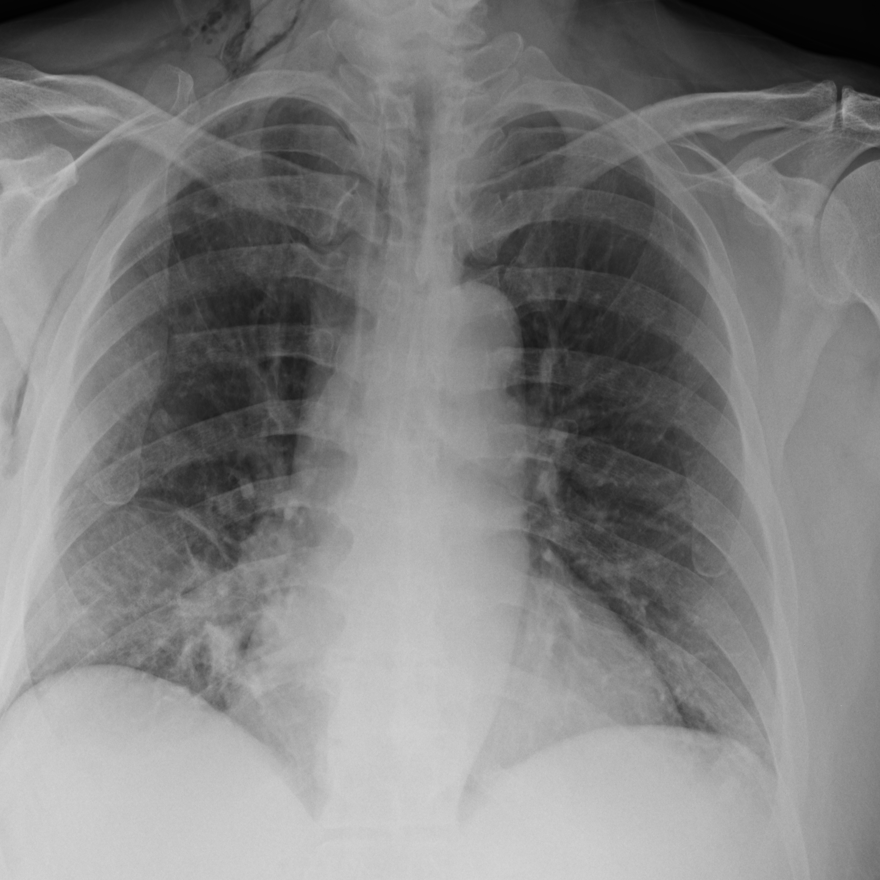

In [31]:

T.Compose([
    T.CenterCrop(880)
])(img)